# 데이터 전처리

- 데이터 구조화 / 병합

**데이터 재구조화**

- 02_Data.xlsx : E-커머스 데이터 / 특정 생필품을 납품하는 업체가 온라인 쇼핑몰 플랫폼에 납품한 데이터
- ERP(전사적 자원 관리 / Enterprise Resource Planning)에서 나오는 데이터들이 이와 같은 형태를 가짐
- DB 매니저들이 사원들의 업무처리가 쉽도록 엑셀에서 보기 직관적이고 사용하기 쉽게 형태를 바꿔놓은 경우

In [2]:
import pandas as pd

In [5]:
df3 = pd.read_excel('02_Data.xlsx', skiprows = 1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   카테고리명                40 non-null     object 
 1   자재그룹명                40 non-null     object 
 2   제품명                  40 non-null     object 
 3   2019-12-01 00:00:00  40 non-null     float64
 4   2019-12-02 00:00:00  40 non-null     float64
 5   2019-12-03 00:00:00  40 non-null     float64
 6   2019-12-04 00:00:00  40 non-null     float64
 7   2019-12-05 00:00:00  40 non-null     float64
 8   2019-12-06 00:00:00  40 non-null     float64
 9   2020-12-01 00:00:00  40 non-null     float64
 10  2020-12-02 00:00:00  40 non-null     float64
 11  2020-12-03 00:00:00  40 non-null     float64
 12  2020-12-04 00:00:00  40 non-null     float64
 13  2020-12-05 00:00:00  40 non-null     float64
 14  2020-12-06 00:00:00  40 non-null     float64
 15  안전재고                 40 non-null     float

In [7]:
# Melt 데이터를 재구조화
df4 = df3.melt(id_vars = ['카테고리명', '자재그룹명','제품명','안전재고','분류'])
df4.head(3)

,카테고리명,자재그룹명,제품명,안전재고,분류,variable,value
0,CHB,E1,A,0.0,E,2019-12-01,0.0
1,CHB,E1,B,0.0,E,2019-12-01,0.0
2,CHB,E1,C,0.0,A,2019-12-01,9474.3


In [10]:
# 특정 항목의 이름을 변경
df5 = df4.rename(columns = {'variable':'날짜', 'value':'매출액(천원)'})

In [12]:
df5['연도'] = df5['날짜'].dt.year

In [14]:
df5.pivot_table(index='연도', values='매출액(천원)', aggfunc='mean')

,매출액(천원)
연도,
2019,8815.025833
2020,2851.369583


**데이터 병합**

- 경기 소재지 친환경 식품을 납품하는 소매점 데이터
- 회원제로 운영되는 매장에서 나온 데이터
- 고객의 개인정보 (03_store_member.csv)와 고객이 구매한 물품(03_store_product.csv)

In [15]:
df_member = pd.read_csv('03_store_member.csv')
df_member.head(3)

,회원번호,회원상태,성별,결혼유무,주소,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46


In [16]:
df_product = pd.read_csv('03_store_product.csv')
df_product.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20220201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20220201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20220201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0


In [17]:
df_member.shape

(4396, 6)

In [18]:
df_product.shape

(735783, 11)

In [19]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   연령      4396 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 206.2+ KB


In [20]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [23]:
# 고객의 구매 특성을 계산해서 -> 고객의 개인정보와 결합해 인사이트 도출
# df_product 데이터에서 고객의 구매경향(구매특성을) 계산하여 고객 정보 데이터에 병합
# 1. 구매 데이터에서 고객의 구매금액 / 방문횟수 / 구매수량같은 통계량을 계산
p1 = df_product.pivot_table(index='회원번호',
                       values=['구매금액','구매수량'], aggfunc='sum').reset_index()

In [25]:
p1.columns = ['회원번호','총구매금액','총구매수량']

In [26]:
p1

,회원번호,총구매금액,총구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


In [28]:
# pd.merge() / on= : Key Column / how= : 병합전략(inner/outer/right/left)
m1 = pd.merge(df_member, p1, on='회원번호', how='inner')
m1.head(3)

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4


In [30]:
df_product['Label'] = 1

In [36]:
# 한명의 회원이 매장에 총 몇 번 방문했는가를 계산
p2 = df_product.pivot_table(index=['회원번호','공급일자'], 
                       values='Label', aggfunc='min').reset_index()
p3 = p2.pivot_table(index='회원번호', values='Label', aggfunc='sum').reset_index()
p4 = p3.rename(columns={'Label':'총방문횟수'})
p4.head(3)

,회원번호,총방문횟수
0,2101.0,86
1,2102.0,79
2,2103.0,126


In [65]:
df2 = pd.merge(m1, p4, on='회원번호', how='inner')
df2

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57
...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1


# EDA (탐색적 데이터 분석)

- 데이터 시각화
    - 1. 데이터의 특성을 빠르게 확인하기 위한 목적
    - 2. 상대방을 설득시킬 자료를 만들기 위한 목적

- 단일 변수 (한 가지 변수에 대해 시각화)
    - 연속형 : 분포의 모양 확인
        - Histogram : 숫자데이터의 빈도수를 막대그래프로 출력한 그래프
            - 현재 수집된 데이터의 분포(정보)를 확인
        - kDE (Kernel Density Estimator, 확률분포도) : 특정 데이터가 존재할 확률 / 모집단의 추정 확률을 계산해 선으로 그린 그래프
            - 분석기법을 선택하기 위한 확률 추정
        - Box Plot : 사분범위를 Box 형태로 표현해 데이터의 분포를 그래프로
    - 범주형 : 항목과 빈도수 (Bar Chart / Pie Chart)
- 다변수 (여러가지 변수들에 대해 시각화)
    - X : 범주형 / Y : 연속형 - 집단 간 통계량을 비교
    - X : 연속형 / Y : 연속형 - 두 숫자 데이터의 상관성 비교 (비례/반비례)
    - X : 순서형(날짜) / Y : 연속형 - 순서나 시간에 따른 추세 확인
    - 기타 : 관리도 / Partto Chart / ...
    - 중첩 (Overlay) : 데이터를 층별화 개념을 이용해 시각화

In [40]:
import seaborn as sns # 정형데이터를 시각화
import matplotlib as mpl # 그래프 옵션 (외부옵션 : 글꼴/저장/...)
import matplotlib.pyplot as plt # 그래프 옵션 (축 설정/범례/범위)

In [42]:
# 한글 글꼴 세팅
# mpl.rc('font', family = 'Malgun Gothic') #Windows에서 사용
mpl.rc('font',family = 'AppleGothic') #Mac에서 사용

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_1414/1055919036.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # 객체의 규격을 정렬


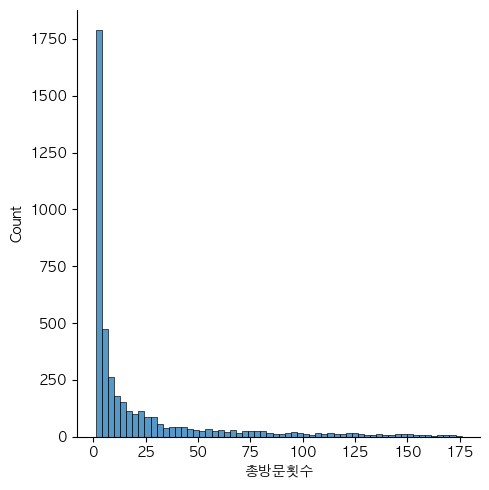

In [46]:
# 단일변수 시각화 (연속형 - 히스토그램)
sns.displot(data=df2, x='총방문횟수')
plt.tight_layout() # 객체의 규격을 정렬
plt.savefig('image1.png') # image1.png 파일 형태로 저장

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


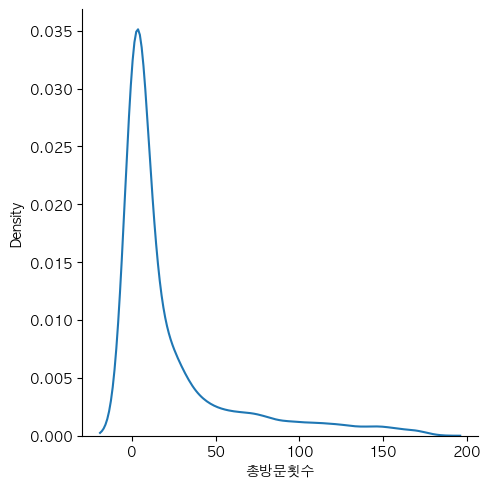

In [47]:
# 확률 밀도 함수 (KDE)
# Overlay 층별화 / hue = 
sns.displot(data=df2, x='총방문횟수', kind='kde')

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


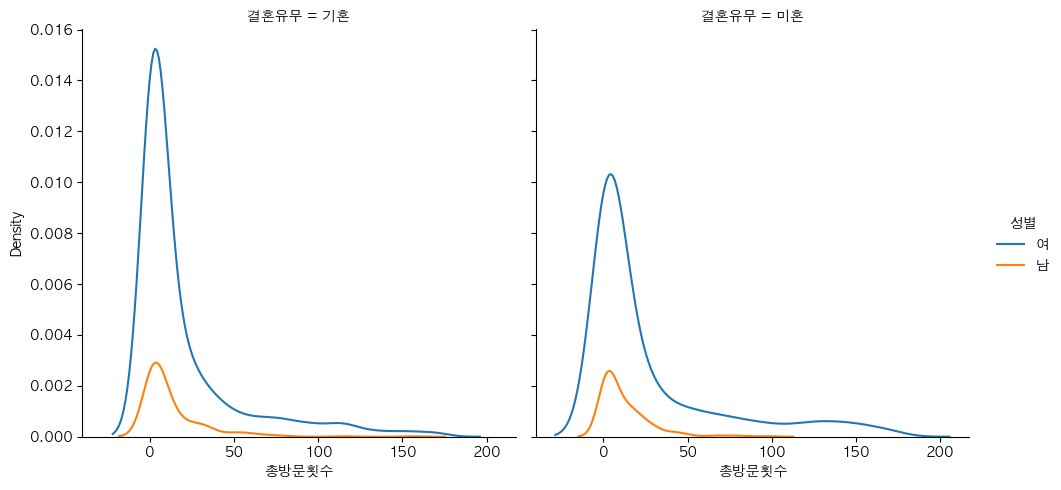

In [49]:
sns.displot(data=df2, x='총방문횟수', kind='kde', hue='성별', col='결혼유무')

<Axes: xlabel='총방문횟수'>

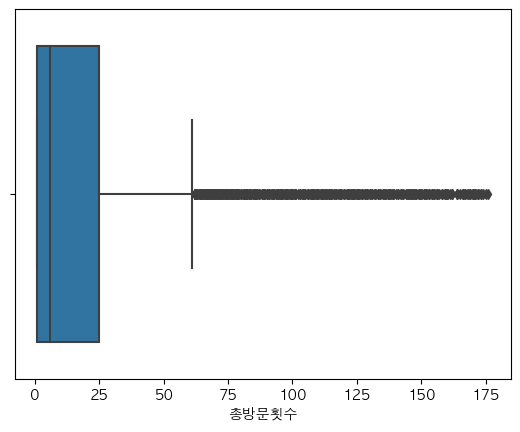

In [50]:
# 연속형 데이터 Box Plot
sns.boxplot(data=df2, x='총방문횟수')

In [51]:
# IQR 통계량
df2.describe()

,회원번호,연령,총구매금액,총구매수량,총방문횟수
count,4285.000000,4285.000000,4.285000e+03,4285.000000,4285.000000
mean,4337.900117,51.014936,9.747687e+05,198.147515,22.463711
std,1257.173949,12.867393,2.168500e+06,441.283026,35.843542
min,2101.000000,23.000000,0.000000e+00,-1.000000,1.000000
25%,3265.000000,41.000000,3.475000e+04,7.000000,1.000000
50%,4349.000000,49.000000,1.477500e+05,30.000000,6.000000
75%,5424.000000,60.000000,7.887900e+05,158.000000,25.000000
max,6496.000000,107.000000,2.234635e+07,4723.500000,176.000000


In [61]:
df2['총방문횟수'].quantile(0.8) # 연속형 자료에 대한 백분위 값을 확인 (상위 20프로)

34.0

In [62]:
# 총 구매금액이 상위 10%인 고객을 A 등급/ 50% B등급 / 나머지는 C 등급으로 분류
cond1 = df2['총구매금액'] >= df2['총구매금액'].quantile(0.9)
cond2 = df2['총구매금액'] >= df2['총구매금액'].quantile(0.5)

df2['고객등급'] = 'C'
df2.loc[cond2, '고객등급'] = 'B'
df2.loc[cond1, '고객등급'] = 'A'

In [63]:
df2['고객등급'].value_counts()

고객등급
C    2141
B    1715
A     429
Name: count, dtype: int64

<Axes: xlabel='고객등급', ylabel='count'>

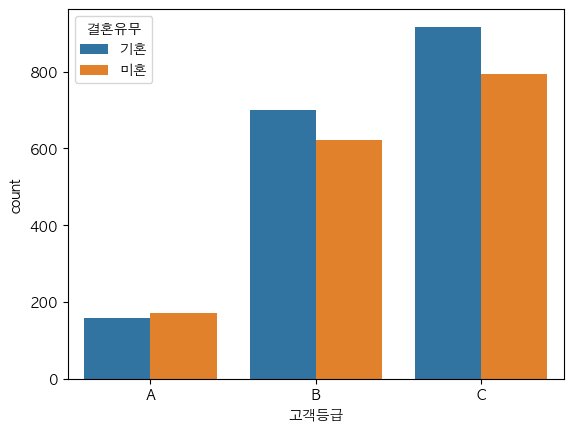

In [64]:
# 범주형 시각화
sns.countplot(data=df2, x='고객등급', hue='결혼유무', order = ['A','B','C'])